# Using game logic and python to calculate probability 

## We will be using concepts from your typical board games to do this experiment

### Rules for the game 
- If you roll 1 or 2 you go down a step
- If you roll 3, 4 or 5 you go up a step
- If you roll a 6, you roll again and go up the that amount of steps

In [2]:
#import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt

##### We can use if, elif, else logic to see the game playout on a turn if we start from step 50, to get a gist of how the game works.

In [10]:
#declare that we are on step 50
step = 50

# np.random.randint will generate a random number between the first arguement(inclusive)
#and the the 2nd arguement (exclusive).
# similar to rolling a six sided die
dice = np.random.randint(1,7)

# If we roll a 1 or 2 we go down a step
if dice <= 2 :
    step = step - 1
# If we roll 3,4 or 5 we go up a step
elif dice > 2 and dice < 6:
    step = step + 1
else :
    step = step + np.random.randint(1,7)
# Print out what we rolled and what step we ended up on
print(dice)
print(step)

4
51


If you rolled a 3, 4 or 5 you went up to step 51, but if you rolled below a 3 you were unlucky and went down a step, but if you rolled a 6 you got to roll again and went up multiple steps if you were lucky.

The code below shows us how a random walk would work. Basically the path we would take if we rolled the die n number of times. 

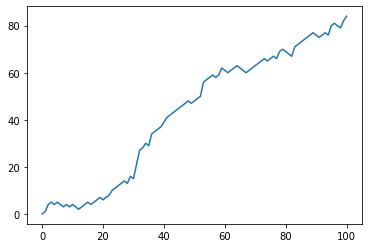

In [12]:
#We declare that we are starting at step 0
random_walk = [0]

for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    if dice <= 2:
        step = max(0, step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

# Plot random_walk
plt.plot(random_walk)

# Show the plot
plt.show()

In [ ]:
Everytime you run the cell above you end on a different step.

In [13]:
all_walks = []
for i in range(10) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)


### Visualize the path of each random walk

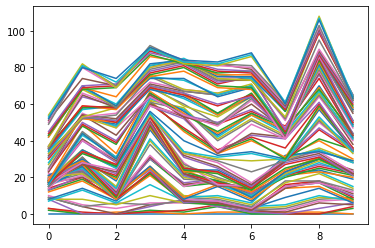

<Figure size 432x288 with 0 Axes>

In [14]:
np_aw = np.array(all_walks)

# Plot np_aw and show
plt.plot(np_aw)
plt.show()
# Clear the figure
plt.clf()

our array needs to be transposed before we make any sense of it

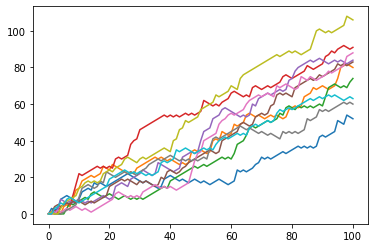

In [17]:
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()